In [46]:
import numpy as np
import pandas as pd
import warnings

In [47]:
warnings.filterwarnings('ignore')

## Get Dataset

In [48]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Movielens_20M_Dataset/ratings.csv', names = column_names)


In [49]:
df.head()

,user_id,item_id,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [50]:
df.shape

(1048575, 4)

In [51]:
df['user_id'].nunique()

7120

In [52]:
df['item_id'].nunique()

14026

In [53]:
movies_title = pd.read_csv('Movielens_20M_Dataset/movies.csv', header = None)

In [54]:
movies_title.shape

(27278, 3)

In [55]:
movies_title = movies_title[[0, 1]]

In [56]:
movies_title.columns = ['item_id', 'title']

In [57]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [58]:
df = pd.merge(df, movies_title, on = 'item_id')

In [59]:
df.tail()

,user_id,item_id,rating,timestamp,title
1048570,7066,88572,1.5,1417484236,Fred: The Movie (2010)
1048571,7066,112412,4.5,1417664231,Perfect Sisters (2014)
1048572,7077,32013,3.5,1170938517,Loop the Loop (Up and Down) (Horem pádem) (2004)
1048573,7086,102596,4.5,1415652345,180° South (180 Degrees South) (180° South: Co...
1048574,7110,65651,2.0,1234434876,Fire and Ice (2008)


## Exploratory Data Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [61]:
df.groupby('title').mean()['rating']

title
"Great Performances" Cats (1998)             2.875000
$5 a Day (2008)                              3.300000
'71 (2014)                                   3.000000
'Hellboy': The Seeds of Creation (2004)      3.125000
'Neath the Arizona Skies (1934)              3.500000
                                               ...   
xXx (2002)                                   2.962389
xXx: State of the Union (2005)               2.500000
¡Three Amigos! (1986)                        3.116208
À nos amours (1983)                          2.000000
À nous la liberté (Freedom for Us) (1931)    3.600000
Name: rating, Length: 14021, dtype: float64

In [62]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Still Bill (2009)                                  5.0
Nameless Gangster (Bumchoiwaui junjaeng) (2012)    5.0
Szamanka (1996)                                    5.0
Keith (2008)                                       5.0
Kiler (1997)                                       5.0
Name: rating, dtype: float64

In [63]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Pulp Fiction (1994)                                           3498
Forrest Gump (1994)                                           3476
Silence of the Lambs, The (1991)                              3247
Shawshank Redemption, The (1994)                              3216
Jurassic Park (1993)                                          3129
                                                              ... 
Pathfinder (Ofelas) (1987)                                       1
Cyberbully (2011)                                                1
Patrice O'Neal: Elephant in the Room (2011)                      1
Patsy, The (1964)                                                1
Koruto wa ore no pasupooto (Colt Is My Passport, A) (1967)       1
Name: rating, Length: 14021, dtype: int64

In [64]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [65]:
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.875
$5 a Day (2008),3.300
'71 (2014),3.000
'Hellboy': The Seeds of Creation (2004),3.125
'Neath the Arizona Skies (1934),3.500


In [66]:
ratings['Num of Ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [67]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,Num of Ratings
title,,
Still Bill (2009),5.0,1
Red's Dream (1987),5.0,1
Beneath Hill 60 (2010),5.0,1
"Silent World, The (Le monde du silence) (1956)",5.0,1
Cobra Verde (1987),5.0,1
...,...,...
Lipstick (1976),0.5,1
Adrift in Tokyo (Tenten) (2007),0.5,1
Daughter of Dr. Jeckyll (1957),0.5,1


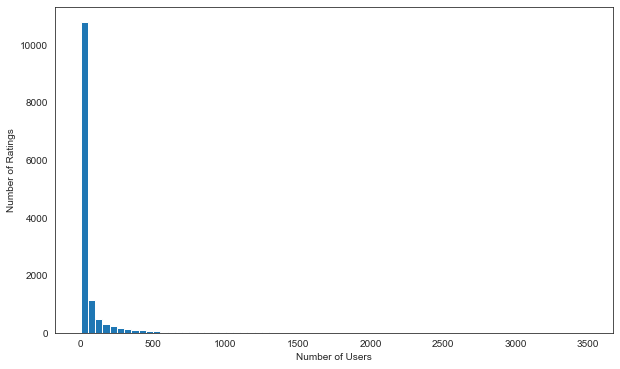

In [68]:
plt.figure(figsize = (10, 6))
plt.hist(ratings['Num of Ratings'], bins = 70)
plt.xlabel('Number of Users')
plt.ylabel('Number of Ratings')
plt.show()

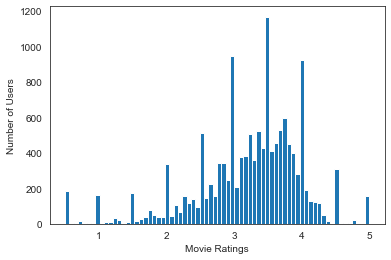

In [69]:
plt.hist(ratings['rating'], bins = 70)
plt.xlabel('Movie Ratings')
plt.ylabel('Number of Users')
plt.show()

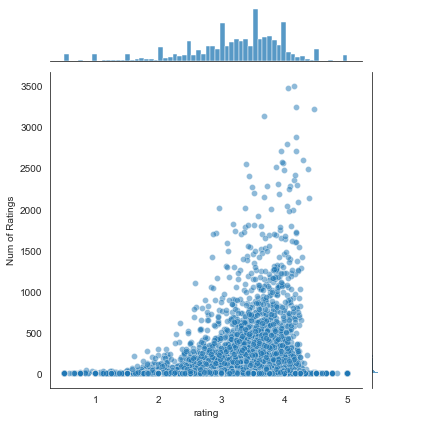

In [70]:
sns.jointplot(x = 'rating', y = 'Num of Ratings', data = ratings, alpha = 0.5)

## Creating Movie Recommendation

In [71]:
df.head()

,user_id,item_id,rating,timestamp,title
0,1,2,3.5,1112486027,Jumanji (1995)
1,5,2,3.0,851527569,Jumanji (1995)
2,13,2,3.0,849082742,Jumanji (1995)
3,29,2,3.0,835562174,Jumanji (1995)
4,34,2,3.0,846509384,Jumanji (1995)


In [72]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [73]:
movie_matrix

title,"""Great Performances"" Cats (1998)",$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
ratings.sort_values('Num of Ratings', ascending = False).head()

,rating,Num of Ratings
title,,
Pulp Fiction (1994),4.153516,3498
Forrest Gump (1994),4.056530,3476
"Silence of the Lambs, The (1991)",4.184786,3247
"Shawshank Redemption, The (1994)",4.469994,3216
Jurassic Park (1993),3.680409,3129


In [75]:
pulpFiction_user_ratings = movie_matrix['Pulp Fiction (1994)']
pulpFiction_user_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [76]:
similar_to_pulpFiction = movie_matrix.corrwith(pulpFiction_user_ratings)

In [77]:
corr_with_pulpFiction = pd.DataFrame(similar_to_pulpFiction, columns = ['Correlation'])

In [78]:
corr_with_pulpFiction.dropna(inplace = True)

In [79]:
corr_with_pulpFiction.head()

,Correlation
title,
'Round Midnight (1986),0.833333
'Salem's Lot (2004),0.683130
'Til There Was You (1997),-0.072479
"'burbs, The (1989)",-0.071418
(500) Days of Summer (2009),0.066468


In [80]:
corr_with_pulpFiction.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
"Hired Hand, The (1971)",1.0
Shuttle (2008),1.0
"Children of Huang Shi, The (2008)",1.0
Lost Boys: The Thirst (2010),1.0
"Lost Embrace (Abrazo partido, El) (2004)",1.0
Louis C.K.: Live at The Comedy Store (2015),1.0
Love in the Time of Cholera (2007),1.0
"Simple-Minded Murder, The (Enfaldige mördaren, Den) (1982)",1.0
"Lower Depths, The (Donzoko) (1957)",1.0


In [81]:
corr_with_pulpFiction = corr_with_pulpFiction.join(ratings['Num of Ratings'])
corr_with_pulpFiction.head()

,Correlation,Num of Ratings
title,,
'Round Midnight (1986),0.833333,7
'Salem's Lot (2004),0.683130,7
'Til There Was You (1997),-0.072479,38
"'burbs, The (1989)",-0.071418,163
(500) Days of Summer (2009),0.066468,271


In [82]:
corr_with_pulpFiction[corr_with_pulpFiction['Num of Ratings'] > 100].sort_values('Correlation', ascending = False)

,Correlation,Num of Ratings
title,,
Pulp Fiction (1994),1.000000,3498
Reservoir Dogs (1992),0.535822,1414
Kill Bill: Vol. 2 (2004),0.399329,1006
Sexy Beast (2000),0.391804,120
Django Unchained (2012),0.389830,220
...,...,...
Gothika (2003),-0.263052,112
Free Willy 2: The Adventure Home (1995),-0.277907,164
13 Going on 30 (2004),-0.287664,170


## Predict Function

In [83]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_of_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_of_movie.dropna(inplace = True)
    
    corr_of_movie = corr_of_movie.join(ratings['Num of Ratings'])
    prediction = corr_of_movie[corr_of_movie['Num of Ratings'] > 100].sort_values('Correlation', ascending = False)
    
    return prediction

In [84]:
predictions = predict_movies('Django Unchained (2012)')

In [85]:
predictions.head(10)

,Correlation,Num of Ratings
title,,
Grand Canyon (1991),1.0,153
Village of the Damned (1995),1.0,118
"Misérables, Les (1995)",1.0,157
"Ideal Husband, An (1999)",1.0,152
Threesome (1994),1.0,173
Cookie's Fortune (1999),1.0,103
Django Unchained (2012),1.0,220
"Very Brady Sequel, A (1996)",1.0,160
"Corrina, Corrina (1994)",1.0,183
